<a href="https://colab.research.google.com/github/ravi007-pixel/LAB/blob/main/lab3_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find part of of your favorite book and save it in a text file. Load the book and split it into single words

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [49]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import wordcloud



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#fetching the book


In [50]:
corpus = open("/content/alice in the wonder land.txt").read().splitlines()
print(corpus)

['Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, ‘and what is the use of a book,’ thought Alice ‘without pictures or conversations?’', '', 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.', '', 'There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, ‘Oh dear! Oh dear! I shall be late!’ (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and look

#Change all words to lower case, remove punctuation and remove stop-words

In [51]:
word = nltk.word_tokenize(corpus[0])
for w in word :
  print(w)

Alice
was
beginning
to
get
very
tired
of
sitting
by
her
sister
on
the
bank
,
and
of
having
nothing
to
do
:
once
or
twice
she
had
peeped
into
the
book
her
sister
was
reading
,
but
it
had
no
pictures
or
conversations
in
it
,
‘
and
what
is
the
use
of
a
book
,
’
thought
Alice
‘
without
pictures
or
conversations
?
’


#Checking the Stopwords in english

In [52]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
# Convert to lowercase and filter non-alphabetic tokens
word_tokens_lower = [word.lower() for word in word if word.isalpha()]


print(word_tokens_lower)
stop_words = set(stopwords.words('english'))
filter_sentences = [w for w in word_tokens_lower if not w in stop_words ]
print(filter_sentences)

['alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'alice', 'without', 'pictures', 'or', 'conversations']
['alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations']


#Try using stemming procedure to reduce the different forms of the words to a common form.

In [54]:
nltk.download('omw-1.4')
stemmer = PorterStemmer()
stemm_word = []
for w in filter_sentences:
  root_word =stemmer.stem(w)
  stemm_word.append(root_word)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
print(stemm_word)

['alic', 'begin', 'get', 'tire', 'sit', 'sister', 'bank', 'noth', 'twice', 'peep', 'book', 'sister', 'read', 'pictur', 'convers', 'use', 'book', 'thought', 'alic', 'without', 'pictur', 'convers']


#Find the frequency distribution of your list of words

In [56]:
freq_distribution = nltk.FreqDist(stemm_word)
freq_distribution

FreqDist({'alic': 2, 'sister': 2, 'book': 2, 'pictur': 2, 'convers': 2, 'begin': 1, 'get': 1, 'tire': 1, 'sit': 1, 'bank': 1, ...})

#Count the total number of occurrences of each word.

In [57]:
larg_words = dict([k,v]for k,v in freq_distribution.items() if len(k)>3)
larg_words

{'alic': 2,
 'begin': 1,
 'tire': 1,
 'sister': 2,
 'bank': 1,
 'noth': 1,
 'twice': 1,
 'peep': 1,
 'book': 2,
 'read': 1,
 'pictur': 2,
 'convers': 2,
 'thought': 1,
 'without': 1}

#Remove some of the initial elements (short words) and build a word-cloud

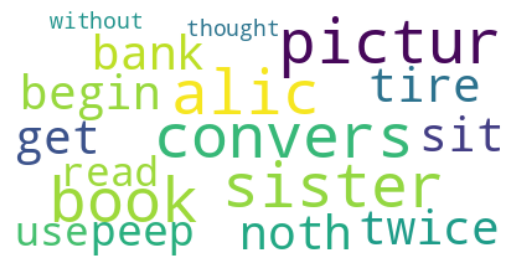

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(freq_distribution)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Divide your book into 3-4 chapters. Treat each chapter as a document.

In [59]:

corpus = open("/content/alice in the wonder land.txt").read().splitlines()

total_lines = len(corpus)
chapter1_end = total_lines // 3
chapter2_end = 2 * (total_lines // 3)

chapter1 = corpus[:chapter1_end]
chapter2 = corpus[chapter1_end:chapter2_end]
chapter3 = corpus[chapter2_end:]

print("Chapter 1:")
print('\n'.join(chapter1))
print("\n\nChapter 2:")
print('\n'.join(chapter2))
print("\n\nChapter 3:")
print('\n'.join(chapter3))


Chapter 1:
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, ‘and what is the use of a book,’ thought Alice ‘without pictures or conversations?’

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, ‘Oh dear! Oh dear! I shall be late!’ (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked 

#Split each document into words (use lower case, stemming, etc.).

In [60]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

# Create a Porter stemmer
porter_stemmer = PorterStemmer()

def preprocess_and_tokenize(text):
    # Convert to lowercase
    text_lower = text.lower()

    tokens = nltk.word_tokenize(text_lower)

    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]

    return stemmed_tokens

processed_chapter1 = preprocess_and_tokenize('\n'.join(chapter1))
processed_chapter2 = preprocess_and_tokenize('\n'.join(chapter2))
processed_chapter3 = preprocess_and_tokenize('\n'.join(chapter3))

print("Processed Chapter 1:")
print(processed_chapter1)
print("\nProcessed Chapter 2:")
print(processed_chapter2)
print("\nProcessed Chapter 3:")
print(processed_chapter3)


Processed Chapter 1:
['alic', 'wa', 'begin', 'to', 'get', 'veri', 'tire', 'of', 'sit', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'have', 'noth', 'to', 'do', ':', 'onc', 'or', 'twice', 'she', 'had', 'peep', 'into', 'the', 'book', 'her', 'sister', 'wa', 'read', ',', 'but', 'it', 'had', 'no', 'pictur', 'or', 'convers', 'in', 'it', ',', '‘', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', '’', 'thought', 'alic', '‘', 'without', 'pictur', 'or', 'convers', '?', '’', 'so', 'she', 'wa', 'consid', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'veri', 'sleepi', 'and', 'stupid', ')', ',', 'whether', 'the', 'pleasur', 'of', 'make', 'a', 'daisy-chain', 'would', 'be', 'worth', 'the', 'troubl', 'of', 'get', 'up', 'and', 'pick', 'the', 'daisi', ',', 'when', 'suddenli', 'a', 'white', 'rabbit', 'with', 'pink', 'eye', 'ran', 'close', 'by', 'her', '.', 'there', 'wa', 'noth', 'so', 'veri', 'remark'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Determine the tf-idf weights of all words in all documents

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [' '.join(chapter1), ' '.join(chapter2), ' '.join(chapter3)]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

feature_names = tfidf_vectorizer.get_feature_names_out()

for doc_index, doc in enumerate(documents):
    print(f"\nTF-IDF Weights for Document {doc_index + 1}:")
    for word, weight in zip(feature_names, tfidf_matrix.toarray()[doc_index]):
        if weight > 0:
            print(f"{word}: {weight}")



TF-IDF Weights for Document 1:
across: 0.08851998489176326
actually: 0.04425999244588163
after: 0.06732173015291532
afterwards: 0.04425999244588163
again: 0.03366086507645766
alice: 0.1568439871762747
all: 0.026140664529379118
and: 0.23526598076441207
another: 0.03366086507645766
as: 0.052281329058758236
at: 0.07842199358813735
bank: 0.04425999244588163
be: 0.052281329058758236
before: 0.026140664529379118
beginning: 0.04425999244588163
book: 0.06732173015291532
burning: 0.04425999244588163
but: 0.07842199358813735
by: 0.07842199358813735
chain: 0.04425999244588163
children: 0.04425999244588163
close: 0.03366086507645766
considering: 0.08851998489176326
conversations: 0.08851998489176326
could: 0.03366086507645766
curiosity: 0.04425999244588163
daisies: 0.04425999244588163
daisy: 0.04425999244588163
day: 0.04425999244588163
dear: 0.06732173015291532
did: 0.026140664529379118
do: 0.03366086507645766
down: 0.052281329058758236
either: 0.026140664529379118
eyes: 0.04425999244588163
feel:

#For each document separately build a word cloud using obtained tf-idf weights.


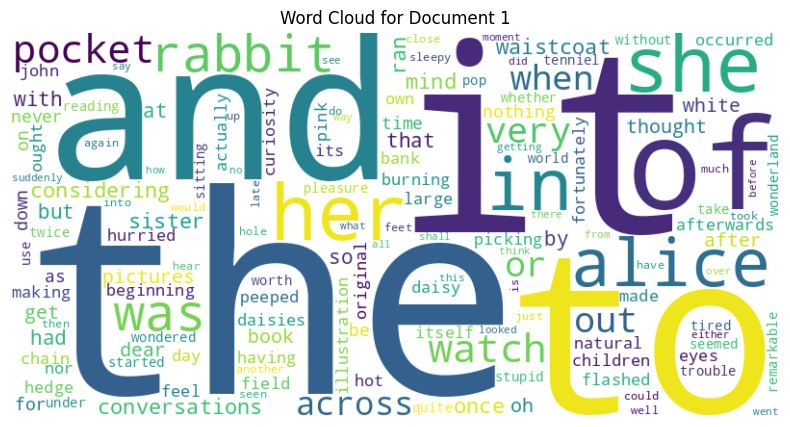

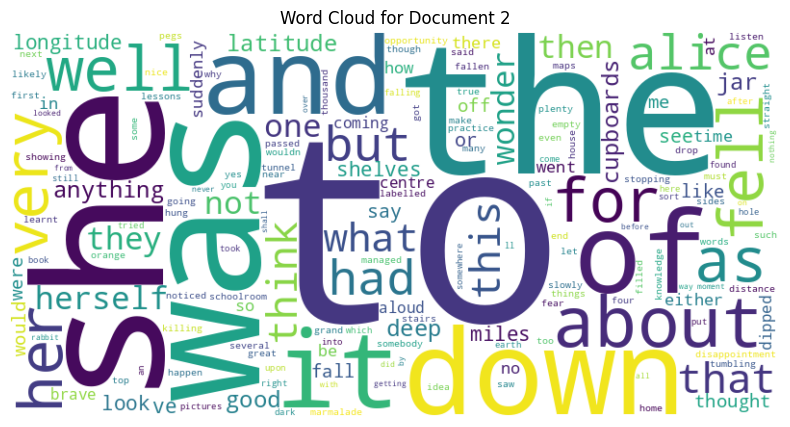

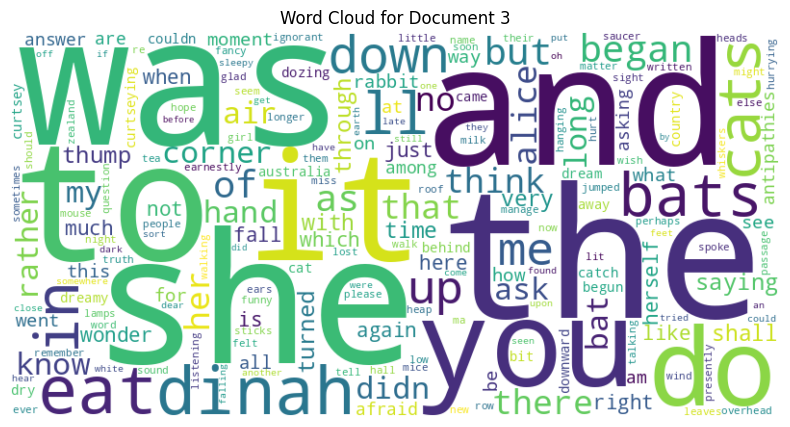

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

documents = [' '.join(chapter1), ' '.join(chapter2), ' '.join(chapter3)]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

feature_names = tfidf_vectorizer.get_feature_names_out()

feature_names_list = feature_names.tolist()

for doc_index, doc in enumerate(documents):
    word_frequencies = {word: tfidf_matrix[doc_index, feature_names_list.index(word)] for word in feature_names_list}

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Document {doc_index + 1}")
    plt.show()



#Build a word cloud based on tf-idf weights for the entire book.


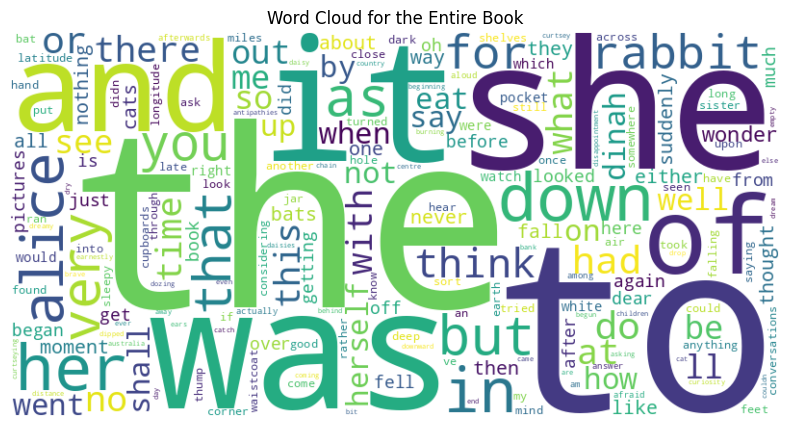

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

full_book = ' '.join(documents)

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix_full = tfidf_vectorizer.fit_transform([full_book])

feature_names_full = tfidf_vectorizer.get_feature_names_out()

feature_names_list_full = feature_names_full.tolist()

word_frequencies_full = {word: tfidf_matrix_full[0, feature_names_list_full.index(word)] for word in feature_names_list_full}

wordcloud_full = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies_full)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for the Entire Book")
plt.show()

